In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
{'Sleeping': 0, 'Other': 1, 'Bed_to_Toilet': 2, 'Meal_Preparation': 3, 'Relax': 4, 'Housekeeping': 5, 'Eating': 6, 'Wash_Dishes': 7, 'Leave_Home': 8, 'Enter_Home': 9, 'Work': 10, 'Respirate': 11}

{'Sleeping': 0,
 'Other': 1,
 'Bed_to_Toilet': 2,
 'Meal_Preparation': 3,
 'Relax': 4,
 'Housekeeping': 5,
 'Eating': 6,
 'Wash_Dishes': 7,
 'Leave_Home': 8,
 'Enter_Home': 9,
 'Work': 10,
 'Respirate': 11}

In [3]:
x = np.load(r'/Users/zehaokou/Desktop/Technion/AI/plot/new_processing/step1_state_index.npy',allow_pickle=True)
#x = x.astype(int)
y = np.load(r'/Users/zehaokou/Desktop/Technion/AI/plot/new_processing/step1_padding100/new_processing_100_padded_step1_Y.npy',allow_pickle=True)
y = y.astype(str)

In [10]:
y[:10]

array(['0', '1', '2', '1', '0', '1', '3', '3', '3', '3'], dtype='<U21')

In [12]:
activity8 = []
for i in range(np.size(y)):
    if y[i] == '8':
        activity8.append(i)
        
activity9 = []
for i in range(np.size(y)):
    if y[i] == '9':
        activity9.append(i)

In [100]:
result = []
enter_count = 0
leave_count = 0

for i in range(430):
    not_nan_count_leave = np.sum(~np.isnan(x[activity8[i]-1]))
    leave = np.sum(~np.isnan(x[activity8[i]]))
    # print(not_nan_count_leave)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_leave, 'St':'leave home'})
    leave_count += 1

    not_nan_count_enter = np.sum(~np.isnan(x[activity9[i]-1]))
    enter = np.sum(~np.isnan(x[activity9[i]]))
    # print(not_nan_count_enter)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_enter, 'St':'enter home'})
    enter_count += 1

In [118]:
df = pd.DataFrame(result)
df

,St-1,Lt-1,St
0,other,100,leave home
1,other,1,enter home
2,other,10,leave home
3,other,1,enter home
4,other,41,leave home
...,...,...,...
855,other,2,enter home
856,other,11,leave home
857,other,1,enter home
858,other,100,leave home


In [119]:
# leave = 1 则计算leave的Transition Probability
# df['St'] = df['St'].replace({'leave home': 1, 'enter home': 0})
df['St'] = df['St'].replace({'leave home': 0, 'enter home': 1})
df

,St-1,Lt-1,St
0,other,100,0
1,other,1,1
2,other,10,0
3,other,1,1
4,other,41,0
...,...,...,...
855,other,2,1
856,other,11,0
857,other,1,1
858,other,100,0


In [120]:
L_mean = df['Lt-1'].sum()/860
print(L_mean)
P_mean = 0.5

# each value minus the mean
df['Lt-1 - L_mean'] = df['Lt-1'] - L_mean
df['St - P_mean'] = df['St'] - P_mean
df['product'] = df['Lt-1 - L_mean'] * df['St - P_mean']
df['square'] = df['Lt-1 - L_mean']**2
df

43.12093023255814


,St-1,Lt-1,St,Lt-1 - L_mean,St - P_mean,product,square
0,other,100,0,56.87907,-0.5,-28.439535,3235.228578
1,other,1,1,-42.12093,0.5,-21.060465,1774.172764
2,other,10,0,-33.12093,-0.5,16.560465,1096.996019
3,other,1,1,-42.12093,0.5,-21.060465,1774.172764
4,other,41,0,-2.12093,-0.5,1.060465,4.498345
...,...,...,...,...,...,...,...
855,other,2,1,-41.12093,0.5,-20.560465,1690.930903
856,other,11,0,-32.12093,-0.5,16.060465,1031.754159
857,other,1,1,-42.12093,0.5,-21.060465,1774.172764
858,other,100,0,56.87907,-0.5,-28.439535,3235.228578


In [121]:
alpha = df['product'].sum()/df['square'].sum()
alpha

-0.009833635732615876

In [122]:
beta = P_mean - alpha * L_mean
beta

0.92403552035852

In [115]:
# P_LEAVE = 0.00983 * df['Lt-1'] + 0.07596
# P_ENTER = -0.00983 * df['Lt-1'] + 0.92404

0      1.059328
1      0.085798
2      0.174301
3      0.085798
4      0.479144
         ...   
855    0.095632
856    0.184134
857    0.085798
858    1.059328
859    0.085798
Name: Lt-1, Length: 860, dtype: float64

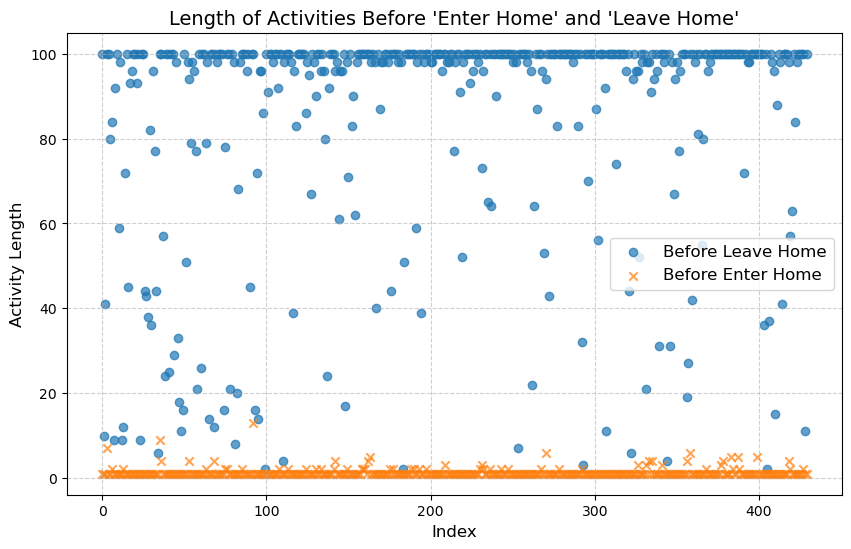

In [ ]:
x[x < 0.2] = np.nan

activity8 = [i for i in range(np.size(y)) if y[i] == '8']
activity9 = [i for i in range(np.size(y)) if y[i] == '9']

# Calculate non-NaN counts for activity8 (leave home) and activity9 (enter home)
not_nan_counts_leave = [np.sum(~np.isnan(x[activity8[i] - 1])) for i in range(min(430, len(activity8)))]
not_nan_counts_enter = [np.sum(~np.isnan(x[activity9[i] - 1])) for i in range(min(430, len(activity9)))]

# Create scatter plot to intuitively represent the lengths
plt.figure(figsize=(10, 6))
plt.scatter(range(len(not_nan_counts_leave)), not_nan_counts_leave, label="Before Leave Home", alpha=0.7, marker='o')
plt.scatter(range(len(not_nan_counts_enter)), not_nan_counts_enter, label="Before Enter Home", alpha=0.7, marker='x')

plt.title("Length of Activities Before 'Enter Home' and 'Leave Home'", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Activity Length", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('enter_leave.svg')
plt.show()